In [1]:
# Cargar librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import pprint
from sklearn.model_selection import train_test_split

# **Lectura de datos**

In [2]:
df_sin_atipicos = pd.read_csv('https://raw.githubusercontent.com/SantiRestrepoOlarte/Trabajo_analitica_2/main/preprocessing_data.csv')
df_sin_atipicos.head(3)

,Reviews,ProductRelated,ExitRates,PageValues>=20,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,2,0.100000,0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
1,0,10,0.050000,0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
2,0,19,0.024561,0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0


In [3]:
df_sin_atipicos.shape

(10570, 13)

In [3]:
# Categorizarización de variables

variables_numericas = ['SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']

for variable in variables_numericas:
  df_sin_atipicos[variable] = df_sin_atipicos[variable].astype('object')

In [4]:
df_dummies = pd.get_dummies(df_sin_atipicos)
df_dummies.head()

,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,Purchase,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,2,0.100000,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,10,0.050000,0,1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,19,0.024561,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,2,0.100000,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,3,0.022222,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


## **Escalado de datos**

In [5]:
# Separación de caracteristicas y target (X , y)
y = df_dummies['Purchase']
X = df_dummies.drop(['Purchase'], axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:",  X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes(exclude='object').columns)

#Estandarización de variables númericas
pipeline = ColumnTransformer([('num', MinMaxScaler() , numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (8456, 74)
Tamaño del conjunto de validación: (2114, 74)


In [6]:
# Convertir array en dataframes
X_train_std = pd.DataFrame(X_train_std,columns=X.columns)
X_test_std = pd.DataFrame(X_test_std,columns=X.columns)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train_std.head()

,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# **Selección de características**

### SelectFromModel con RandomForestClassifier

Como se observó en el notebook de preprocesamiento y exploración, el método que arrojó un mejor recall para el conjunto de datos con selección de características fue el método integrado (SelectFromModel) utilizando un RandomForestClassifier con un threshold de 0.00001, el cual selecciona 70 de las 75 columnas.

In [7]:
# Select from model con RandomForestClassifier utilizando un threshold = 0.00001

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Selector de variables con RandomForest
sel_ = SelectFromModel(RandomForestClassifier(random_state=42), threshold = 0.00001)#max_features=40, )
sel_.fit(X_train_std, y_train)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_rf_train_3 = X_train_std.iloc[:,X_new_class]
X_Purchase_rf_test_3 = X_test_std.iloc[:,X_new_class]
X_Purchase_rf_train_3.head()

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
X_Purchase_rf_train_3.head(3)

,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.126214,0.077778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## **1. Regresión logística**

### **1.1. Regresión logística (Modelo base)**

In [ ]:
# Entrenamiento del modelo
modelo_rl = LogisticRegression()

# Ajustar el modelo a los datos
modelo_rl.fit(X_train_std, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, modelo_rl.predict(X_train_std)))
print ("Train - classification report:\n", metrics.classification_report(y_train, modelo_rl.predict(X_train_std)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, modelo_rl.predict(X_test_std)))
print ("Test - classification report :", metrics.classification_report(y_test, modelo_rl.predict(X_test_std)))

Train - Accuracy : 0.8512298959318827
Train - classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      7119
           1       0.60      0.18      0.27      1337

    accuracy                           0.85      8456
   macro avg       0.73      0.58      0.60      8456
weighted avg       0.82      0.85      0.82      8456

Test - Accuracy : 0.8623462630085147
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1800
           1       0.62      0.19      0.29       314

    accuracy                           0.86      2114
   macro avg       0.75      0.58      0.61      2114
weighted avg       0.84      0.86      0.83      2114



En base al classification report encontramos que el modelo de regresión logística presenta un accuracy bastante favorable tanto en train como en test. Sin embargo, se logra apreciar que el modelo presenta métricas muy favorables para predecir la clase 'False' pero un poco más bajas para predecir la clase 'True' de nuestra variable objetivo, lo que demuestra que el modelo se inclina por la clase más frecuente ('False') y que se debe prestar atención al tratamiento de los modelos dado que se cuenta con clases desbalanceadas.

### Matriz de confusión Regresión logística (Modelo base)

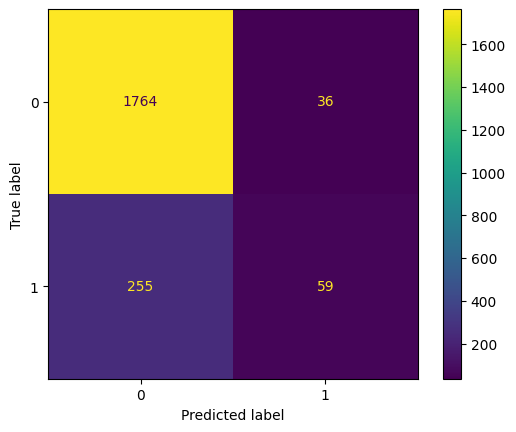

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, modelo_rl.predict(X_test_std))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

### Curva ROC con Regresión logística (Modelo base)

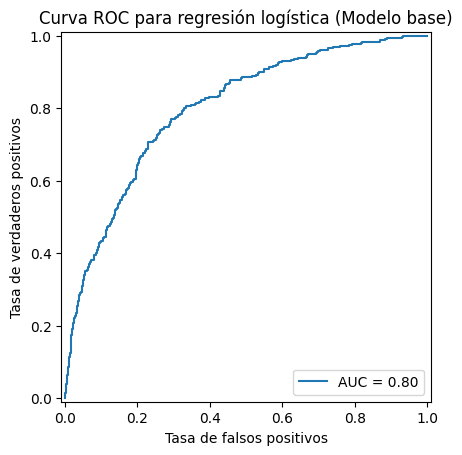

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot

# Calcular las probabilidades de la clase positiva
y_prob = modelo_rl.predict_proba(X_test_std)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para regresión logística (Modelo base)")
plt.show()

La gráfica anterior muestra que el modelo de regresión logística tiene un buen rendimiento, ya que tiene un AUC de 0,80, lo que significa que el modelo es capaz de distinguir entre los clientes que comprarán y los que no comprarán con una precisión del 80%.
Sin embargo, el modelo tiene algunos falsos positivos y falsos negativos que demuestran la pequeña imprecisión por parte de este, y en este caso particular, los falsos positivos son más costosos que los falsos negativos, ya que pueden representar oportunidades de venta pérdidas.

### **1.2. Regresión logística con selección de características (método integrado - SelectFromModel)**

In [ ]:
# Entrenamiento del modelo
modelo_rl_SFM = LogisticRegression()

# Ajustar el modelo a los datos
modelo_rl_SFM.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, modelo_rl_SFM.predict(X_Purchase_rf_train_3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, modelo_rl_SFM.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, modelo_rl_SFM.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, modelo_rl_SFM.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.8512298959318827
Train - classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      7119
           1       0.60      0.18      0.27      1337

    accuracy                           0.85      8456
   macro avg       0.73      0.58      0.60      8456
weighted avg       0.82      0.85      0.82      8456

Test - Accuracy : 0.8623462630085147
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1800
           1       0.62      0.19      0.29       314

    accuracy                           0.86      2114
   macro avg       0.75      0.58      0.61      2114
weighted avg       0.84      0.86      0.83      2114



### Matriz de confusión Regresión logística (método integrado - SelectFromModel)

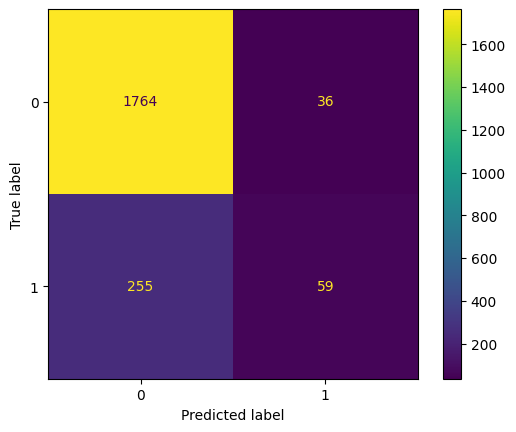

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm2= confusion_matrix(y_test, modelo_rl_SFM.predict(X_Purchase_rf_test_3))
# Visualización de la matriz de confusion
cm2_display = ConfusionMatrixDisplay(confusion_matrix = cm2)
cm2_display.plot()
plt.show()

### Curva ROC con Regresión logística (método integrado - SelectFromModel)

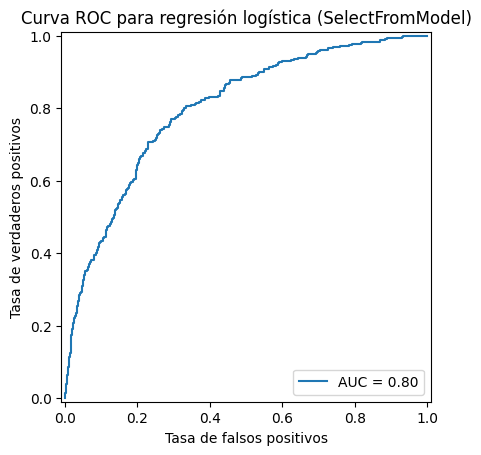

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot

# Calcular las probabilidades de la clase positiva
y_prob = modelo_rl_SFM.predict_proba(X_Purchase_rf_test_3)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para regresión logística (SelectFromModel)")
plt.show()

Luego de la ejecución, en comparación con el rendimiento del modelo utilizando todos los datos originales, el modelo de regresión logística con selección de características presenta un rendimiento idéntico al original.

### **1.3. Regresión logística con tunning de hiperparámetros**

In [ ]:
# Identificación de parametros de optimización

print("+----------------------\nModelo - Regresión logística:")
pprint.pprint(modelo_rl_SFM.get_params())

+----------------------
Modelo Base - Regresión logística:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Definición de parametros para optimización

param = {
    'C': [1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear', 'sag', 'saga']
}

In [ ]:
# Búsqueda aleatoria

# Definición de cuadricula de búsqueda
rand_rl = RandomizedSearchCV(modelo_rl_SFM, param_distributions=param)

# Iniciar la búsqueda
rand_rl.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'sag', 'saga']})

In [ ]:
print('Mejores Hiperparámetros: ', rand_rl.best_params_)
print('Mejor Score: ', rand_rl.best_score_)

Mejores Hiperparámetros:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 1}
Mejor Score:  0.8499287005464893


In [ ]:
# Métricas de desempeño modelo óptimo
# ==============================================================================
rl_optimo = rand_rl.best_estimator_
print ("Train - Accuracy :", metrics.accuracy_score(y_train, rl_optimo.predict(X_Purchase_rf_train_3)))
print ("Train - classification report :", metrics.classification_report(y_train, rl_optimo.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, rl_optimo.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, rl_optimo.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.8507568590350048
Train - classification report :               precision    recall  f1-score   support

           0       0.86      0.98      0.92      7119
           1       0.60      0.18      0.27      1337

    accuracy                           0.85      8456
   macro avg       0.73      0.58      0.59      8456
weighted avg       0.82      0.85      0.81      8456

Test - Accuracy : 0.8623462630085147
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1800
           1       0.62      0.19      0.29       314

    accuracy                           0.86      2114
   macro avg       0.75      0.58      0.61      2114
weighted avg       0.84      0.86      0.83      2114



### Matriz de confusión de regresión logística con parámetros optimizados

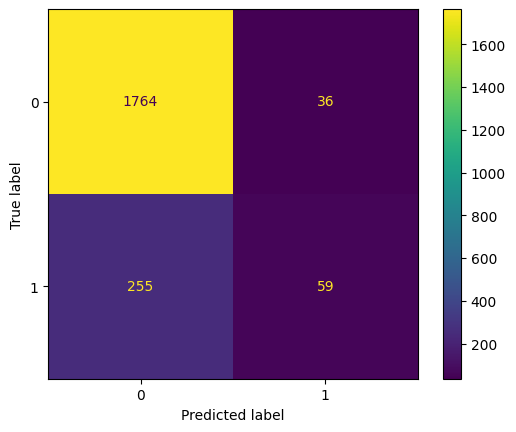

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm12= confusion_matrix(y_test, rl_optimo.predict(X_Purchase_rf_test_3))
# Visualización de la matriz de confusion
cm12_display = ConfusionMatrixDisplay(confusion_matrix = cm12)
cm12_display.plot()
plt.show()

### Curva ROC para regresión logística con parámetros optimizados

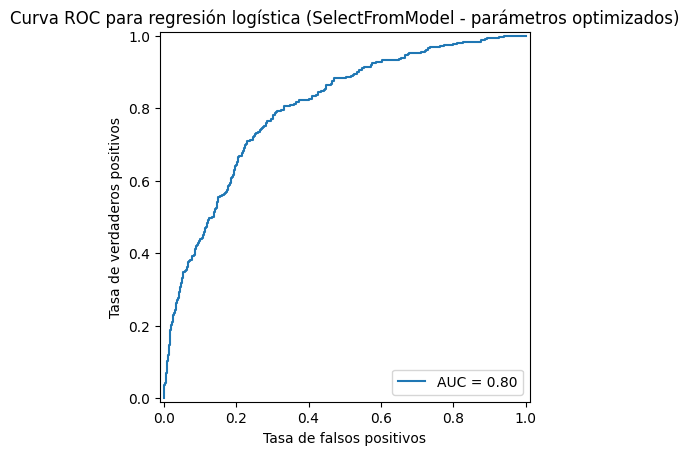

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot

# Calcular las probabilidades de la clase positiva
y_prob = rl_optimo.predict_proba(X_Purchase_rf_test_3)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para regresión logística (SelectFromModel - parámetros optimizados)")
plt.show()

Ahora, el modelo de regresión logística optimizado tiene un buen rendimiento en general, con un accuracy de 85% y un AUC de 0.80 en el conjunto de prueba.

Además, el modelo es capaz de predecir correctamente la clase 'False' con una alta precisión (87%) y recall (98%). Sin embargo, el modelo tiene un rendimiento más bajo en la predicción de la clase 'True', con una precisión del 62% y un recall del 19%. Esto es debido a que el modelo está sesgado hacia la clase 'False' y necesita mejorar su capacidad para predecir la clase 'True'.

Una posible explicación para este sesgo es que el conjunto de datos está desequilibrado, con una mayor proporción de ejemplos de la clase 'False'.

Para mejorar el rendimiento del modelo, se podrían explorar otros algoritmos de clasificación que sean más adecuados para conjuntos de datos desequilibrados.

## **2. Random Forest**

### **2.1. Random Forest (Modelo base)**

In [9]:
# Entrenamiento del modelo
# ==============================================================================
ranfor = RandomForestClassifier()
ranfor.fit(X_train_std, y_train)

<ipython-input-9-8b72f4df4eb1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(X_train_std, y_train)


RandomForestClassifier()

### Matriz de confusión con Random Forest (modelo base)

In [10]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_std)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_std)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_std)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_std)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7119
           1       1.00      1.00      1.00      1337

    accuracy                           1.00      8456
   macro avg       1.00      1.00      1.00      8456
weighted avg       1.00      1.00      1.00      8456

Test - Accuracy : 0.9058656575212867
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1800
           1       0.76      0.54      0.63       314

    accuracy                           0.91      2114
   macro avg       0.84      0.76      0.79      2114
weighted avg       0.90      0.91      0.90      2114



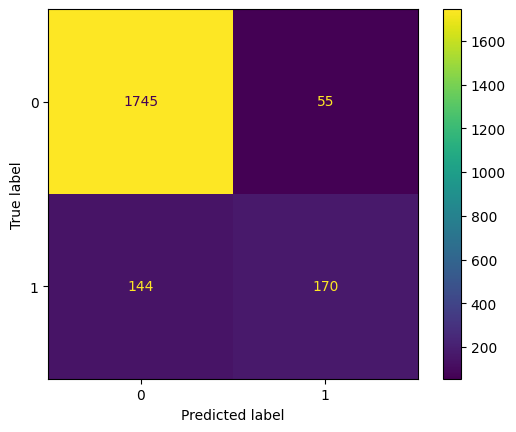

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm4= confusion_matrix(y_test, ranfor.predict(X_test_std))
# Visualización de la matriz de confusion
cm4_display = ConfusionMatrixDisplay(confusion_matrix = cm4)
cm4_display.plot()
plt.show()

### Curva ROC para Random Forest (modelo base)

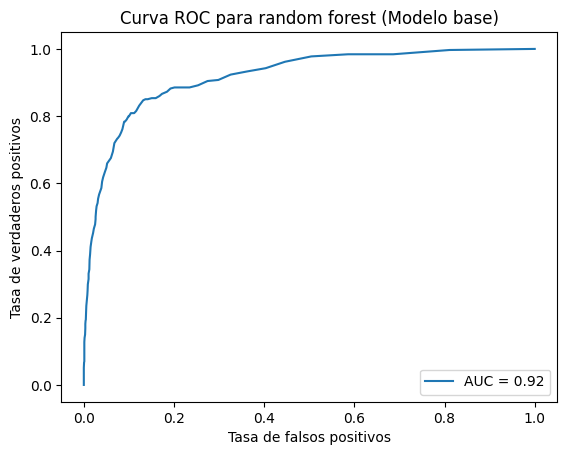

In [12]:
# Curva ROC

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot

# Calcular las probabilidades de la clase positiva
y_prob = ranfor.predict_proba(X_test_std)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para random forest (Modelo base)")
plt.show()

El modelo random forest utilizado con la base de datos estándar (sin selección de características ni optimización de hiperparámetros) presenta un buen desempeño ya que los resultados con los datos train y test presentan unas metricas muy buenas, aunque con los datos de train tenemos unas m´´etricas de desempeño muy altas (100%) lo que puede significar que el modelo está sobreajustado (overfitting) pero al analizar las métricas de test se puede evidenciar que siguen siendo buenas dado que la precision (74%), el recall(53%), el f1-score(62%) son inferiores al 100% pero mejores que en la regresión logística por ejemplo.

Ahora, en la matriz de confusion se puede identificar que el modelo tiene un buen número de TN (True negative) lo que indica que está prediciendo de manera correcta los usuarios que realmente no compraron. También es importante aclarar que este dato es superior con respecto a los otros cuadrantes ya que los datos se encuentran desbalanceados y no hay la misma cantidad de compradores que de no compradores, por lo que es normal que presente ese valor tan alto.

En nuesto caso de estudio es importante reducir el número de false positive ya que estas representan personas que no compraron en el e-commerce y que el modelo me predice que si lo hacen, por lo que podría generar sobrecostos si pensamos en basar nuestra producción en nuestros compradores.

En la curva ROC tenemos una una AUC del 92%, lo que indica que nuestro modelo se está adaptando bien a los datos reales de la base de datos.

Gracias a las métricas obtenidas y al comportamiento de la matriz de confusion podemos preveer que hasta el momento es el mejor modelo para nuestro proyecto.

### **2.2. Random Forest con selección de características (método integrado - SelectionFromModel)**

In [12]:
# Entrenamiento del modelo
# ==============================================================================
ranforSFM = RandomForestClassifier()
ranforSFM.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [14]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranforSFM.predict(X_Purchase_rf_train_3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranforSFM.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranforSFM.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranforSFM.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7119
           1       1.00      1.00      1.00      1337

    accuracy                           1.00      8456
   macro avg       1.00      1.00      1.00      8456
weighted avg       1.00      1.00      1.00      8456

Test - Accuracy : 0.9011352885525071
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1800
           1       0.73      0.53      0.61       314

    accuracy                           0.90      2114
   macro avg       0.83      0.75      0.78      2114
weighted avg       0.89      0.90      0.89      2114



### Matriz de confusión con Random Forest (método integrado - SelectFromModel)

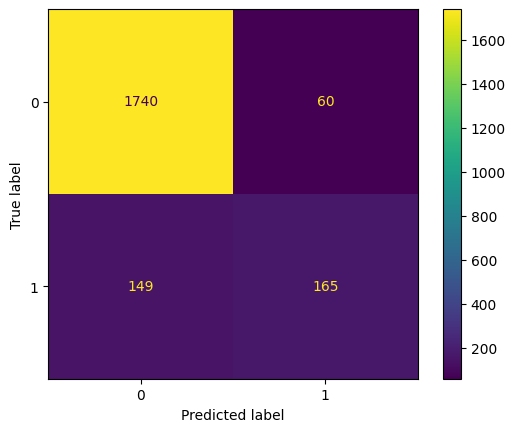

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm5= confusion_matrix(y_test, ranforSFM.predict(X_Purchase_rf_test_3))
# Visualización de la matriz de confusion
cm5_display = ConfusionMatrixDisplay(confusion_matrix = cm5)
cm5_display.plot()
plt.show()

### Curva ROC para Random Forest (método integrado - SelectFromModel)

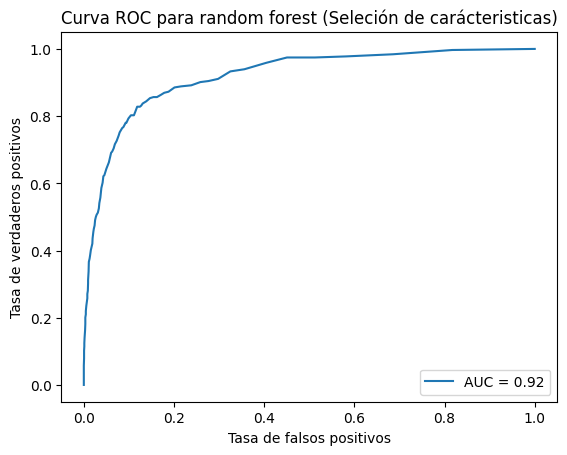

In [16]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot

# Calcular las probabilidades de la clase positiva
y_prob = ranforSFM.predict_proba(X_Purchase_rf_test_3)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para random forest (Seleción de carácteristicas)")
plt.show()

Luego de analizar el random forest con selección de características podemos identificar que tiene unas metricas de desempeño muy similares, ya que solo cambian entre 1% y 3%. Así mismo, en la matriz de confusión podemos observar que los false positive subieron 1 unidad y los true negative bajaron 1 unidad. Este mismo comportamiento sucedió con los false negative que bajó 10 unidades, las cuales subieron en los true positive. Al analizar esto, podemos concluir que apesar de estos cambios se mejoró más los true positive (+10) de lo que se redujo los true negative (-1) por lo que podríamos decir que hasta el momento el modelo de random forest con la base de datos con selección de características funciona un poco mejor que con la base de datos estándar.

En la gráfica ROC podemos ver que tiene el mismo comportamiento del modelo anterior manteniendo un AUC del 92%.

### **2.3. Random Forest con parámetros optimizados**

In [13]:
# Identificación de parametros de optimización

print("+----------------------\nModelo - RandomForest:")
pprint.pprint(ranforSFM.get_params())

+----------------------
Modelo - RandomForest:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [14]:
# Definición de los parámetros para la búsqueda aleatoria
params = {
    'bootstrap': [True, False],
    'n_estimators': np.linspace(250, 1000, 5).astype(int), # Aumenta la granularidad de n_estimators
    'class_weight': ['balanced', None],
    'max_depth': np.linspace(10, 30, 100).astype(int), # Aumenta la granularidad de max_depth
    'max_features': ['sqrt', 'log2', None], # Se incluyen nuevas opciones para max_features
    'min_samples_split': [2, 5, 10], # Se incluyen nuevos valores para min_samples_split
    'min_samples_leaf': [1, 2, 4], # Se incluyen nuevos valores para min_samples_leaf
    'min_impurity_decrease': [0.0, 0.001, 0.005], # Se incluye el parámetro min_impurity_decrease
    'ccp_alpha': [0.0001, 0.001, 0.01], # Se incluye el parámetro ccp_alpha
    'n_jobs': [-1],
    'random_state': [42] # Se fija la semilla aleatoria para la reproducibilidad
}

In [18]:
# Búsqueda aleatoria

# Definición de cuadricula de búsqueda
rand_rf = RandomizedSearchCV(ranforSFM, param_distributions=params) #¿verbose=True)?

# Iniciar la búsqueda
rand_rf.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0001, 0.001, 0.01],
                                        'class_weight': ['balanced', None],
                                        'max_depth': array([10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23,
       23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 30]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_impurity_decrease': [0.0, 0.001,
                                                                  0.005],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 250,  437,  625,  812, 1000]),
                                        'n_jobs': [-1], 'random_state': [42]})

In [19]:
print('Mejores Hiperparámetros: ', rand_rf.best_params_)
print('Mejor Score: ', rand_rf.best_score_)

Mejores Hiperparámetros:  {'random_state': 42, 'n_jobs': -1, 'n_estimators': 437, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_features': 'sqrt', 'max_depth': 18, 'class_weight': None, 'ccp_alpha': 0.0001, 'bootstrap': True}
Mejor Score:  0.9011352690435948


In [20]:
# Métricas de desempeño modelo óptimo
# ==============================================================================
rf_optimo = rand_rf.best_estimator_
print ("Train - Accuracy :", metrics.accuracy_score(y_train, rf_optimo.predict(X_Purchase_rf_train_3)))
print ("Train - classification report :", metrics.classification_report(y_train, rf_optimo.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, rf_optimo.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, rf_optimo.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.9320009460737938
Train - classification report :               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7119
           1       0.91      0.63      0.75      1337

    accuracy                           0.93      8456
   macro avg       0.92      0.81      0.85      8456
weighted avg       0.93      0.93      0.93      8456

Test - Accuracy : 0.9077578051087984
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1800
           1       0.80      0.51      0.62       314

    accuracy                           0.91      2114
   macro avg       0.86      0.74      0.78      2114
weighted avg       0.90      0.91      0.90      2114



### Matriz de confusión de Random Forest con parámetros optimizados

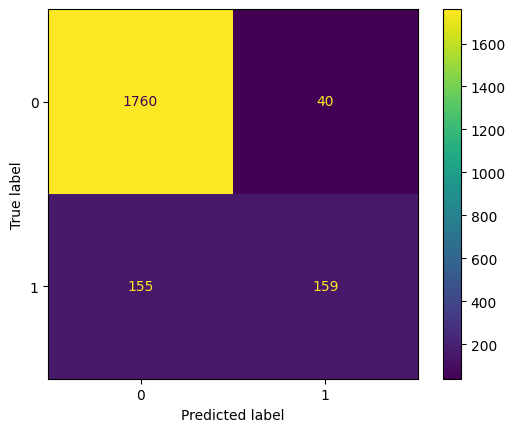

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm6= confusion_matrix(y_test, rf_optimo.predict(X_Purchase_rf_test_3))
# Visualización de la matriz de confusion
cm6_display = ConfusionMatrixDisplay(confusion_matrix = cm6)
cm6_display.plot()
plt.show()

### Curva ROC para Random Forest con parámetros optimizados

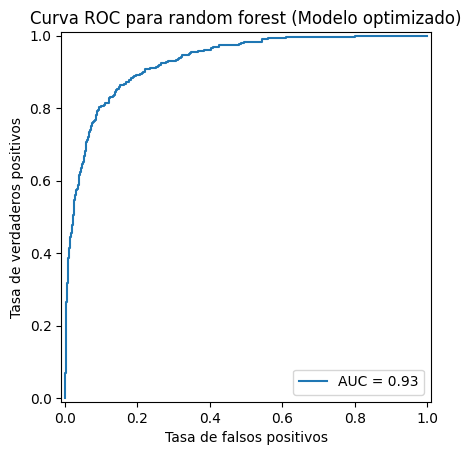

In [22]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot

# Calcular las probabilidades de la clase positiva
y_prob = rf_optimo.predict_proba(X_Purchase_rf_test_3)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para random forest (Modelo optimizado)")
plt.show()

Con el último modelo de Random Forest con hiperparámetros optimizados se puede lograr un resultado en exactitud de los datos en train del 92.5% y en los datos de test un 89.1%. Este modelo parece ser el más favorable ya que al no tener sus métricas de desempeño al 100% pues no se evidencia overfitting, además los valores de las métricas de desempeño son muy similares tanto en train como en test por lo que es un modelo potencial para desplegar con los datos que tenemos.

En este modelo optimizado presenta unos niveles altos en true positive y true negative, logrando de esta forma minimizar los false positive para una óptima toma de decisiones en la e-commerce.

Adicionalmente se puede evidenciar que la gráfica ROC de este modelo presenta un AUC de 0.93, siendo hasta ahora el nivel más alto de los modelos obtenidos. Así mismo, este rendimiento puede ser justificado gracias a la optimización de los parámetros que incluye este modelo de aprendizaje supervisado.

Por ahora, **el modelo de Random Forest con parámetros optimizados es el que mejor rendimiento ha tenido** dadas sus métricas de desempeño y su comportamiento tanto en la matriz de confusión como en la curva ROC.


## **3. Gradient Boosting Machine**

### **3.1. Gradient Boosting Machine (Modelo base)**

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento del modelo
gboos = GradientBoostingClassifier()

# Ajustar el modelo a los datos
gboos.fit(X_train_std, y_train)


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [11]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train_std)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train_std)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_std)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_std)))

Train - Accuracy : 0.9184011352885525
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7119
           1       0.79      0.66      0.72      1337

    accuracy                           0.92      8456
   macro avg       0.86      0.82      0.84      8456
weighted avg       0.91      0.92      0.92      8456

Test - Accuracy : 0.9077578051087984
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1800
           1       0.72      0.63      0.67       314

    accuracy                           0.91      2114
   macro avg       0.83      0.79      0.81      2114
weighted avg       0.90      0.91      0.91      2114



El modelo tiene un buen rendimiento con respecto a su exactitud, tanto en train ocmo en test. Se evidencia que el model es capaz de identificar mas facilmente los clientes que no compraron, con una precisión de 94%, en comparación de los que si compraron, ya que su precisión es del 79%, por lo que para el modelo tiene problemas para identificar la clase positiva. Sin embargo, para se el modelo sin selección de características ni optimizado está mostrando un comportamiento bastante bueno.

### Matriz de confusión con Gradient Boosting Machine (modelo base)

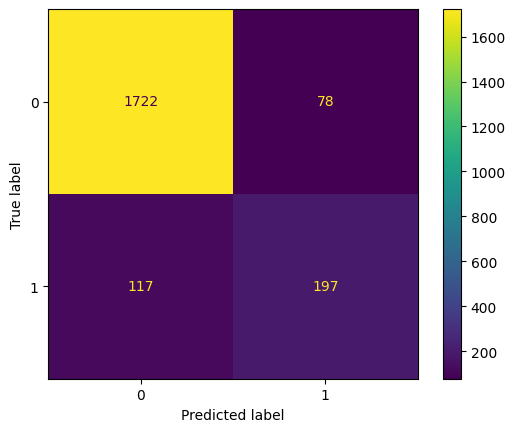

In [26]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusion
cm7= confusion_matrix(y_test, gboos.predict(X_test_std))

# Visualización
cm7_display = ConfusionMatrixDisplay(confusion_matrix = cm7)
cm7_display.plot()
plt.show()

En la matriz de confusión se evidencia el problema menciondo anteriormente, respecto a que este tiene problemas para identificar los usuarios que realmente si realizan una compra (verdaderos positivos), ya que presentan una alta cantidad en los falsos negativos (prediciendo los usuarios que no compran mientras realmente si estan comprando).

### Curva ROC para Gradient Boosting Machine (modelo base)

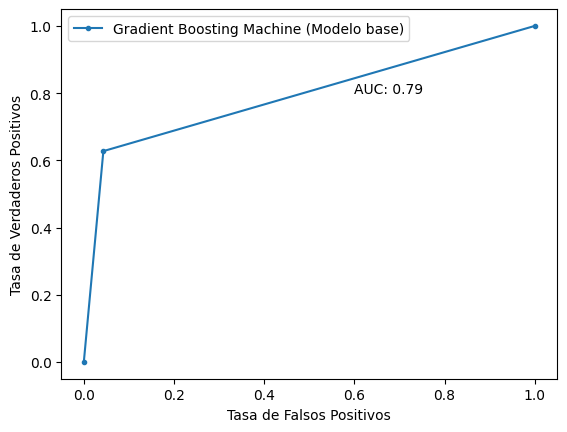

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las curvas ROC
fpr, tpr, _ = roc_curve(y_test, gboos.predict(X_test_std))

roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Pintamos las curvas ROC
pyplot.plot(fpr, tpr, marker='.', label='Gradient Boosting Machine (Modelo base)')

# Añadimos un cuadro de texto con el valor del AUC
plt.text(0.6, 0.8, 'AUC: {:.2f}'.format(roc_auc))

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

De la curva ROC observamos que a pesar de que el modelo arroja unas métricas de desempeño bastante elevadas, se obtiene un valor AUC de 0.79, lo que da a entender que es capaz de diferenciar la clase positiva y negativa con una precisión del 79%. Dicho valor también puede variar dado que la curva es un vector, mientras que en los modelos anteriores realmente si era una curva.

### **3.2. Gradient boosting machine con selección de características (método integrado - SelectFromModel)**

In [28]:
# Entrenamiento del modelo
gboos_SFM = GradientBoostingClassifier()

# Ajustar el modelo a los datos
gboos_SFM.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [29]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos_SFM.predict(X_Purchase_rf_train_3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos_SFM.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos_SFM.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos_SFM.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.9184011352885525
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7119
           1       0.79      0.66      0.72      1337

    accuracy                           0.92      8456
   macro avg       0.86      0.82      0.84      8456
weighted avg       0.91      0.92      0.92      8456

Test - Accuracy : 0.9077578051087984
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1800
           1       0.72      0.63      0.67       314

    accuracy                           0.91      2114
   macro avg       0.83      0.79      0.81      2114
weighted avg       0.90      0.91      0.91      2114



### Matriz de confusión con Gradient Boosting Machine (método integrado - SelectFromModel)

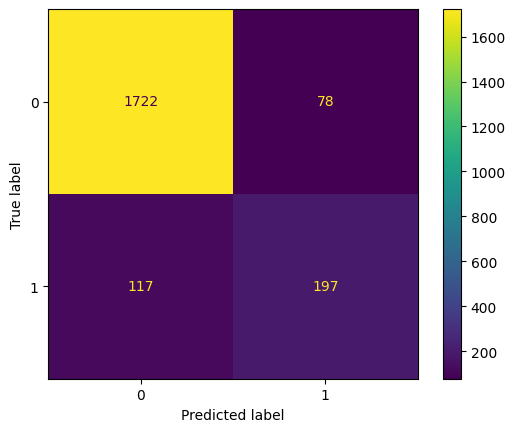

In [30]:
# Matriz de confusion
cm8= confusion_matrix(y_test, gboos_SFM.predict(X_Purchase_rf_test_3))

# Visualización de la matriz de confusion
cm8_display = ConfusionMatrixDisplay(confusion_matrix = cm8)
cm8_display.plot()
plt.show()

### Curva ROC para Gradient Boosting Machine (método integrado - SelectFromModel)

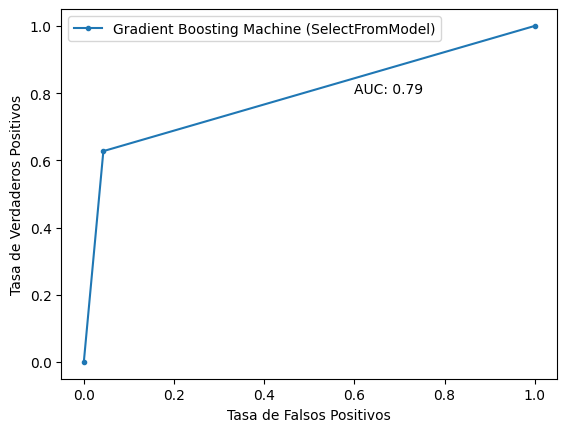

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las curvas ROC
fpr, tpr, _ = roc_curve(y_test, gboos_SFM.predict(X_Purchase_rf_test_3))

roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Pintamos las curvas ROC
pyplot.plot(fpr, tpr, marker='.', label='Gradient Boosting Machine (SelectFromModel)')

# Añadimos un cuadro de texto con el valor del AUC
plt.text(0.6, 0.8, 'AUC: {:.2f}'.format(roc_auc))

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Ahora bien, presentando el modelo con selección de características, se logra ifentifica que el modelo presenta un rendimiento similar al original.

### **3.3. Gradient boosting machine con parámetros optimizados**

In [33]:
print("+----------------------\nModelo - gboos:")
pprint.pprint(gboos_SFM.get_params())

+----------------------
Modelo - gboos:
{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Definición de los parámetros para optimización
params = {
    'max_depth': [15,50,100],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [8,10,12,14],
    'min_samples_leaf': [6,8,10,12,15],
    'n_estimators': [100,150,300,1000],
    'loss': ['log_loss', 'exponential']
}


In [44]:
# Búsqueda aleatoria

# Definición de cuadricula de búsqueda
rand_gboos = RandomizedSearchCV(gboos_SFM, param_distributions=params)

# Iniciar la búsqueda
rand_gboos.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['log_loss', 'exponential'],
                                        'max_depth': [15, 50, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [8, 10, 12, 14],
                                        'min_samples_leaf': [6, 8, 10, 12, 15],
                                        'n_estimators': [100, 150, 300, 1000]})

In [45]:
print('Mejores Hiperparámetros: ', rand_gboos.best_params_)
print('Mejor Score: ', rand_gboos.best_score_)

Mejores Hiperparámetros:  {'n_estimators': 100, 'min_samples_leaf': 12, 'max_leaf_nodes': 12, 'max_features': 'log2', 'max_depth': 15, 'loss': 'log_loss'}
Mejor Score:  0.9045654717717074


In [46]:
# Métricas de desempeño modelo óptimo
# ==============================================================================
gboos_optimo = rand_gboos.best_estimator_
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos_optimo.predict(X_Purchase_rf_train_3)))
print ("Train - classification report :", metrics.classification_report(y_train, gboos_optimo.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos_optimo.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos_optimo.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.918755912961211
Train - classification report :               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7119
           1       0.79      0.66      0.72      1337

    accuracy                           0.92      8456
   macro avg       0.87      0.81      0.84      8456
weighted avg       0.91      0.92      0.92      8456

Test - Accuracy : 0.9124881740775781
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1800
           1       0.74      0.63      0.68       314

    accuracy                           0.91      2114
   macro avg       0.84      0.80      0.82      2114
weighted avg       0.91      0.91      0.91      2114



### Matriz de confusión de Gradient boosting machine con parámetros optimizados

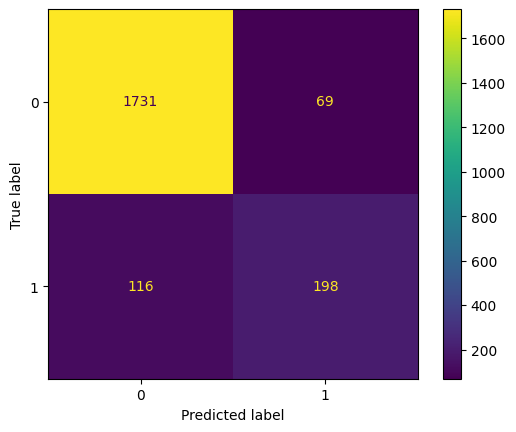

In [47]:
# Matriz de confusion
cm9= confusion_matrix(y_test, gboos_optimo.predict(X_Purchase_rf_test_3))

# Visualización de la matriz de confusion
cm9_display = ConfusionMatrixDisplay(confusion_matrix = cm9)
cm9_display.plot()
plt.show()

### Curva ROC para Gradient boosting machine con parámetros optimizados

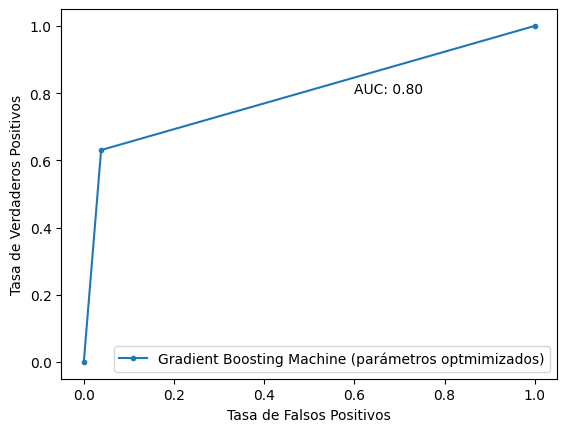

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las curvas ROC
fpr, tpr, _ = roc_curve(y_test, gboos_optimo.predict(X_Purchase_rf_test_3))

roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Pintamos las curvas ROC
pyplot.plot(fpr, tpr, marker='.', label='Gradient Boosting Machine (parámetros optmimizados)')

# Añadimos un cuadro de texto con el valor del AUC
plt.text(0.6, 0.8, 'AUC: {:.2f}'.format(roc_auc))

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Dados los resultados del modelo gradient boosting classifier optimzado se puede concluir que este ha sido el mejor modelo por ahora, superando al Random Forest optimizado. Esto se concluye dado que presenta valores realmente favorables en sus métricas de desempeño tanto en train como en test, y lo más importante es que este modelo es el que mejores métricas ha arrojado para las predicciones de la clase positiva, por lo que reduce al máximo el efecto que produce el desbalanceo de clases. Además, el modelo arroja métricas realmente cercanas tanto en train como en test lo que deja concluir que el modelo no presenta sobreajuste.

Por otro lado, al comparar la matriz de confusión de este modelo con el Random Forest optimizado se logra percibir que este maximiza la cantidad de verdaderos positivos y verdaderos negativos, y aunque se aumenta un poco la cantidad de falsos positivos también logra reducir notablemente la cantidad de falsos negativos.

Dicho todo esto, el modelo gradient boosting machine optimizado es el mejor modelo empleado por ahora.

## **4. Support Vector Machine**

### **4.1. Support Vector Machine (Modelo base)**

In [8]:
from sklearn.svm import SVC

In [50]:
svm_model = SVC()
svm_model.fit(X_train_std, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [51]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_std)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_std)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_std)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_std)))

Train - Accuracy : 0.8559602649006622
Train - classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      7119
           1       0.73      0.14      0.24      1337

    accuracy                           0.86      8456
   macro avg       0.79      0.57      0.58      8456
weighted avg       0.84      0.86      0.81      8456

Test - Accuracy : 0.8599810785241249
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.99      0.92      1800
           1       0.64      0.13      0.22       314

    accuracy                           0.86      2114
   macro avg       0.75      0.56      0.57      2114
weighted avg       0.83      0.86      0.82      2114



### Matriz de confusión con SVM (modelo base)

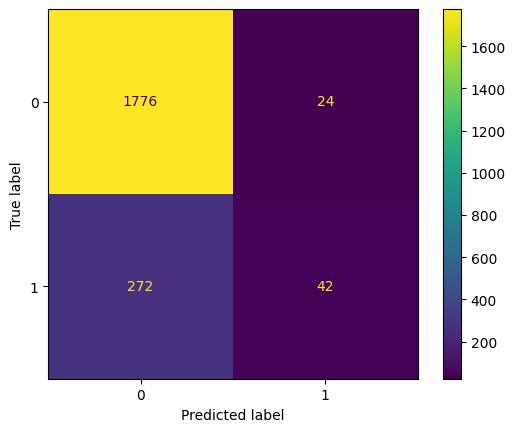

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm10= confusion_matrix(y_test, svm_model.predict(X_test_std))
# Visualización de la matriz de confusion
cm10_display = ConfusionMatrixDisplay(confusion_matrix = cm10)
cm10_display.plot()
plt.show()

### Curva ROC para SVM (modelo base)

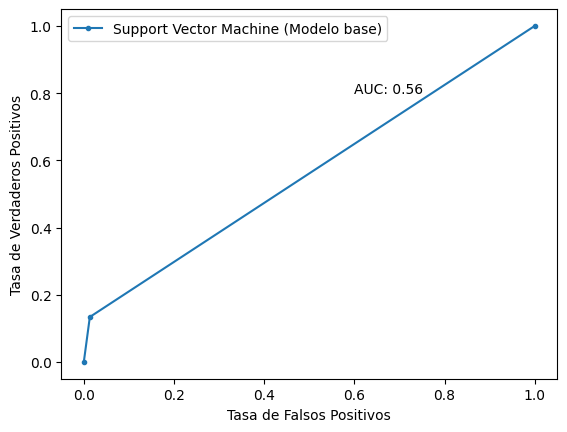

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las curvas ROC
fpr, tpr, _ = roc_curve(y_test, svm_model.predict(X_test_std))

roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Pintamos las curvas ROC
pyplot.plot(fpr, tpr, marker='.', label='Support Vector Machine (Modelo base)')

# Añadimos un cuadro de texto con el valor del AUC
plt.text(0.6, 0.8, 'AUC: {:.2f}'.format(roc_auc))

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Al realizar el modelo de Support Vector Machine con los datos iniciales (sin selección de características ni optimización de hiperparámetros) percibimos que el modelo no presenta sobreajuste dado que tanto en test como en train obtenemos un accuracy similar (cercano al 86%). Sin embargo, el modelo si parece presentar cierta incapacidad de predecir correctamente a los usuarios que si son compradores (*'Purchase'* = True) ya que las métricas de desempeño arrojadas en el classification report para los valores de 'True' se reducen considerablemente comparados con los valores de 'False'.

Ahora, a partir de la matriz de confusión evidenciamos el comportamiento descrito anteriormente en el cual el modelo presenta limitaciones para predecir a los usuarios que realizan la compra (*'Purchase'* = True). Esto se evidencia fácilmente al ver que la matriz de confusión presenta una gran cantidad de falsos negativos (el modelo predice que no son compradores mientras si lo son) y una cantidad reducida de verdaderos positivos (predicciones correctas de los usuarios que si son compradores). Sin embargo, el modelo si logra predecir correctamente los verdaderos negativos (los usuarios que no son compradores) por lo que el modelo se tiende a inclinar por la clase 'False'.

 Lo anterior se puede deber principalmente al desbalanceo de clases en la variable objetivo *'Purchase'*, por lo que se espera que el modelo presente un mejor rendimiento con el ajuste de hiperparámetros que se realizan más adelante.

### **4.2. Support Vector Machine con selección de características (método integrado - SelectFromModel)**

In [9]:
svm_model_SFM = SVC()
svm_model_SFM.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [55]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model_SFM.predict(X_Purchase_rf_train_3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model_SFM.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model_SFM.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model_SFM.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.8559602649006622
Train - classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      7119
           1       0.73      0.14      0.24      1337

    accuracy                           0.86      8456
   macro avg       0.79      0.57      0.58      8456
weighted avg       0.84      0.86      0.81      8456

Test - Accuracy : 0.8604541154210028
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.99      0.92      1800
           1       0.65      0.13      0.22       314

    accuracy                           0.86      2114
   macro avg       0.76      0.56      0.57      2114
weighted avg       0.83      0.86      0.82      2114



### Matriz de confusión con SVM (método integrado - SelectFromModel)

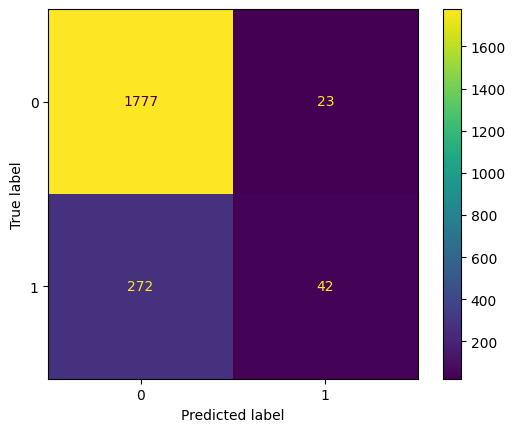

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm11= confusion_matrix(y_test, svm_model_SFM.predict(X_Purchase_rf_test_3))
# Visualización de la matriz de confusion
cm11_display = ConfusionMatrixDisplay(confusion_matrix = cm11)
cm11_display.plot()
plt.show()

Una vez ejecutado el modelo Support Vector Machine con selección de características se encuentra que el modelo presenta prácticamente el mismo rendimiento que con los datos iniciales.

### Curva ROC para SVM (método integrado - SelectFromModel)

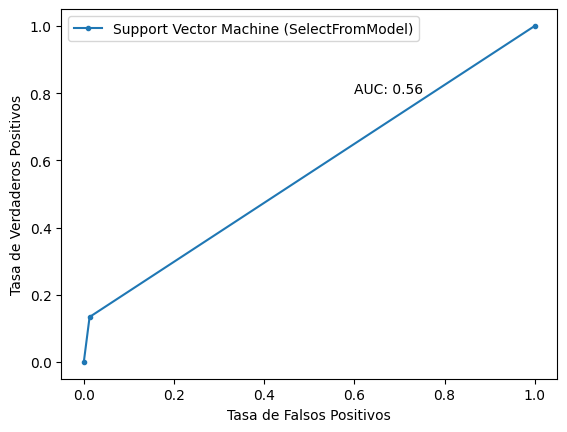

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las curvas ROC
fpr, tpr, _ = roc_curve(y_test, svm_model_SFM.predict(X_Purchase_rf_test_3))

roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Pintamos las curvas ROC
pyplot.plot(fpr, tpr, marker='.', label='Support Vector Machine (SelectFromModel)')

# Añadimos un cuadro de texto con el valor del AUC
plt.text(0.6, 0.8, 'AUC: {:.2f}'.format(roc_auc))

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

### **4.3. Support Vector Machine con parámetros optimizados**

In [57]:
# Identificación de parametros de optimización

print("+----------------------\nModelo - SVM:")
pprint.pprint(svm_model_SFM.get_params())

+----------------------
Modelo - SVM:
{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [10]:
# Definición de parametros para optimización

params = {
    'kernel': ['linear','sigmoid','poly'],
    'gamma' : ['scale', 'float', 'auto'],
    'max_iter': [-1],
    'C': [1, 10, 100, 1000],
    #'shrinking': [True, False],
    'class_weight': [None, 'balanced'],
    #'decision_function_shape' : ['ovo', 'ovr']
}

In [11]:
# Búsqueda aleatoria

# Definición de cuadricula de búsqueda
rand_svm = RandomizedSearchCV(svm_model_SFM, param_distributions=params) #¿verbose=True)?

# Iniciar la búsqueda
rand_svm.fit(X_Purchase_rf_train_3, y_train)

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'class_weight': [None, 'balanced'],
                                        'gamma': ['scale', 'float', 'auto'],
                                        'kernel': ['linear', 'sigmoid', 'poly'],
                                        'max_iter': [-1]})

In [12]:
print('Mejores Hiperparámetros: ', rand_svm.best_params_)
print('Mejor Score: ', rand_svm.best_score_)

Mejores Hiperparámetros:  {'max_iter': -1, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': None, 'C': 10}
Mejor Score:  0.8443701392296583


In [13]:
# Métricas de desempeño modelo óptimo
# ==============================================================================
svm_optimo = rand_svm.best_estimator_
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_optimo.predict(X_Purchase_rf_train_3)))
print ("Train - classification report :", metrics.classification_report(y_train, svm_optimo.predict(X_Purchase_rf_train_3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_optimo.predict(X_Purchase_rf_test_3)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_optimo.predict(X_Purchase_rf_test_3)))

Train - Accuracy : 0.8450804162724692
Train - classification report :               precision    recall  f1-score   support

           0       0.86      0.97      0.91      7119
           1       0.53      0.18      0.26      1337

    accuracy                           0.85      8456
   macro avg       0.70      0.57      0.59      8456
weighted avg       0.81      0.85      0.81      8456

Test - Accuracy : 0.8571428571428571
Test - classification report :               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1800
           1       0.55      0.21      0.30       314

    accuracy                           0.86      2114
   macro avg       0.71      0.59      0.61      2114
weighted avg       0.83      0.86      0.83      2114



Una vez ejecutado el modelo de SVM con optimización de hiperparámetros se encuentra que las métricas de desempeño son realmente muy parecidos a los modelos de SVM anteriores, sin embargo, se logra mejorar un poco el recall y el f1 score para la predicción de la clase positiva (True) y dada la naturaleza del conjunto de datos pues se podría pensar que el mejor modelo es el que aumente estas métricas. Así mismo, no se evidencia sobreajuste en el modelo dado que las métricas arrojadas en train y test casi que no se distancian entre ellas.

### Matriz de confusión de SVM con parámetros optimizados

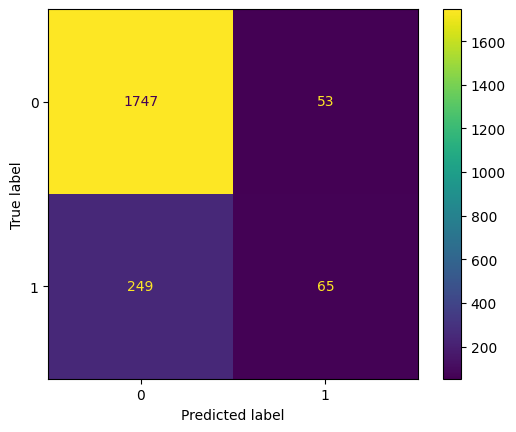

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm12= confusion_matrix(y_test, svm_optimo.predict(X_Purchase_rf_test_3))
# Visualización de la matriz de confusion
cm12_display = ConfusionMatrixDisplay(confusion_matrix = cm12)
cm12_display.plot()
plt.show()

### Curva ROC para SVM con parámetros optimizados

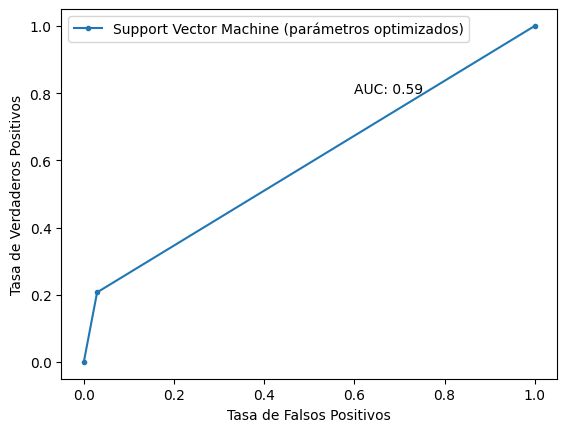

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las curvas ROC
fpr, tpr, _ = roc_curve(y_test, svm_optimo.predict(X_Purchase_rf_test_3))

roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Pintamos las curvas ROC
pyplot.plot(fpr, tpr, marker='.', label='Support Vector Machine (parámetros optimizados)')

# Añadimos un cuadro de texto con el valor del AUC
plt.text(0.6, 0.8, 'AUC: {:.2f}'.format(roc_auc))

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

In [ ]:
# Falsos negativos: esquina inferior izquierda (el modelo precide que el usuario no compra mientras si compra)
# Verdaderos positivos: esquina inferior derecha (el modelo predice que el usuario compra mientras compra)
# Falsos positivos: esquina superior derecha (el modelo predice que el usuario compra mientras no compra)
# Verdaderos negativos: esquina superior izquierda (el modelo predice que el usuario no compra mientras no compra)

Y gracias a la matriz de confusión evidenciamos lo descrito anteriormente ya que se mejora notablemente la predicción de los verdaderos positivos y aumenta el número de falsos positivos, lo que da muestra de que el modelo con parámetros optimizados realiza mejores predicciones para la clase 'True'. Así mismo, la matriz muestra que se reducen un poco los verdaderos negativos y los falsos negativos.

Sin embargo, este modelo no llega a pelear con los modelos vistos anteriormente como el Random Forest y el Gradient Boosting Machine por lo que se descarta como opción de modelo a desplegar.

# **Conclusiones generales**

Una vez ejecutados los modelos se evidencia que los mejores resultados los arrojan los modelos de Random Forest y Gradient Boosting Machine, y que los modelos de regresión logística y Support Vector Machine se quedan un poco relegados por sus resultados. Además, se evidenció que la gran mayoría de modelos arrojan resultados realmente consistentes y cercanos entre train y test lo que nos demuestra que los modelos no sufrieron de sobreajuste ni subajuste, sin embargo, el modelo base y con SelectFromModel de Random Forest si logró obtener algo de sobreajuste al obtener todas sus métricas de desempeño en 100% en train pero no en test, por ende, a pesar de las buenas métricas que arrojaban estos modelos pues no fueron escogidos como el mejor modelo.

Caso contrario lo que sucedió con los modelos de Gradient Boosting Machine y Random Forest optimizados, los cuales obtuvieron unas métricas de desempeño bastante buenas y consistentes, ubicándolos como los dos mejores modelos ejecutados para el proyecto. Sin embargo, se escoge el modelo de **Gradient Boosting Machine optimizado** dado que obtiene métricas ligeramente superiores en el conjunto de datos de test y además, maximiza los valores de recall y f1 score que son métricas realmente relevantes para nosotros dada la naturaleza de nuestro problema (clasificación) y el desbalanceo de clases en nuestra variable objetivo.

Finalmente, se concluye que el modelo de Gradient Boosting puede obtener un desempeño ligeramente superior al Random Forest ya que es un modelo basado en múltiples árboles de decisión que se enfoca en ir corrigiendo los errores cometidos por el árbol anterior, lo que hace que el aprendizaje de este modelo sea secuencial y pueda obtener una mayor precisión en sus resultados. 